In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ptycho_v2.tools_v2.ptychography import Ptychography

In [17]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
linop = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)


In [18]:
image = plt.imread('images/peppers_reduced.jpg')[:2**7, :2**7] / 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**7, 2**7)
image_tensor_ = torch.exp(1j * image_tensor)

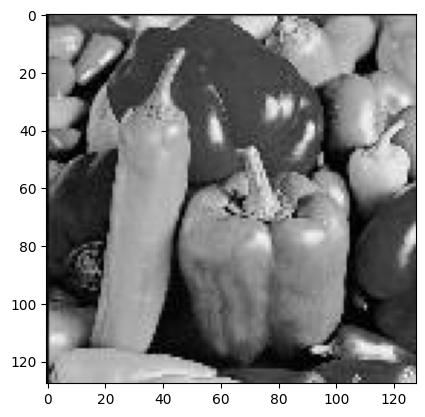

In [19]:
plt.imshow(image, cmap='gray')

In [20]:
a = linop.apply_linop(image_tensor_)
print(a.shape)

torch.Size([1, 289, 512, 512])


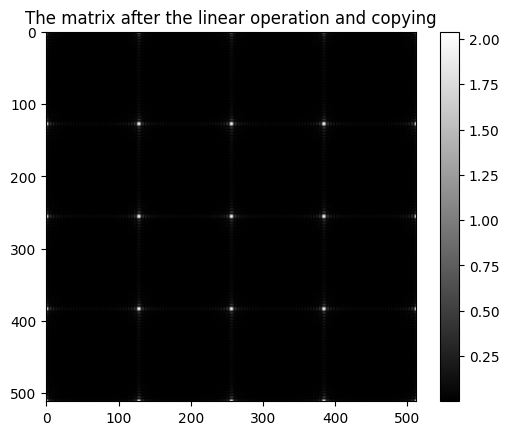

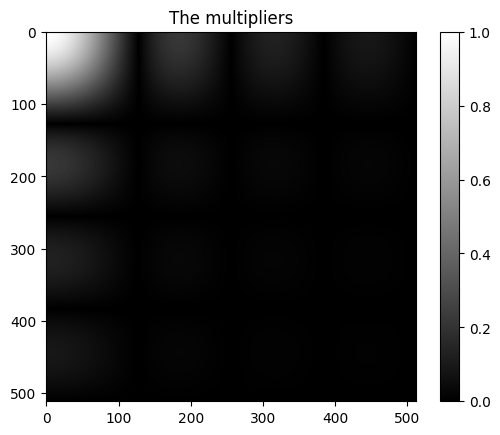

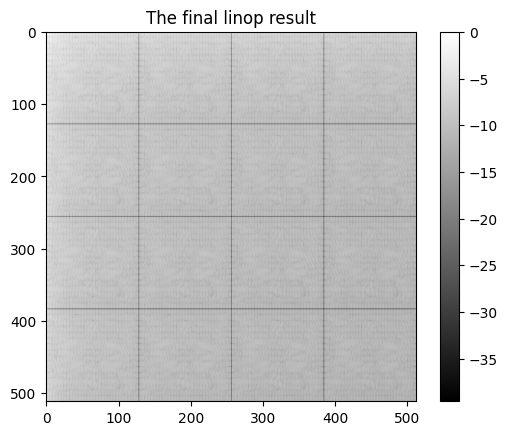

In [21]:
plt.figure()
plt.title("The matrix after the linear operation and copying")
plt.imshow(torch.abs(linop.copy_matrx[0,150]).cpu().numpy(), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.title("The multipliers")
plt.imshow(torch.abs(linop.multipliers).cpu().numpy(), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.title("The final linop result")
plt.imshow(torch.log(torch.abs(a[0, 102]).cpu()).numpy(), cmap='gray')
plt.colorbar()
plt.show()


In [22]:
c = linop.apply_linopT(a)

In [23]:
print(c.shape)

torch.Size([1, 1, 128, 128])


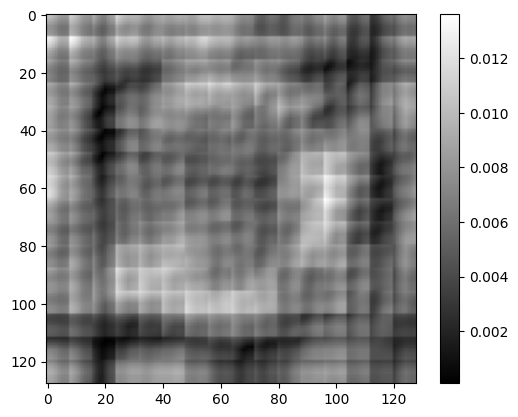

In [24]:
plt.figure()
plt.imshow(torch.abs(c[0, 0]).cpu().numpy(),cmap='gray')
plt.colorbar()
plt.show()

In [25]:
x_t = torch.randn(1, 1, 2**7, 2**7, device=device, dtype=torch.double)
y_t = torch.randn(1, 289, 2**9,2**9, device=device, dtype=torch.double)

In [26]:
a1 = (y_t*linop.apply_linop(x_t)).sum()
a2 = (x_t * linop.apply_linopT(y_t)).sum()

In [27]:
a1

tensor(-23.3213+88.0937j, device='cuda:0', dtype=torch.complex128)

In [28]:
a2

tensor(-50.6659-36.5247j, device='cuda:0', dtype=torch.complex128)